<a href="https://colab.research.google.com/github/chasuke2008/chatbot_app/blob/main/DLtest1_%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%81%A3%E3%81%A6%E3%81%AA%E3%81%AB%EF%BC%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **第1章 ディープラーニングってなに？**

リスト1-2 数字の画像認識をするニューラルネットワーク
手書き数字の形を学習し、別の「数字の画像データ」を渡して「それが何の数字かを予測」します。

In [1]:
!pip install tensorflow==2.11.0

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2615 - accuracy: 0.9249 - val_loss: 0.1424 - val_accuracy: 0.9560
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1153 - accuracy: 0.9664 - val_loss: 0.1036 - val_accuracy: 0.9686
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0881 - val_accuracy: 0.9731
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0875 - val_accuracy: 0.9740
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0837 - val_accuracy: 0.9754
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0831 - val_accuracy:

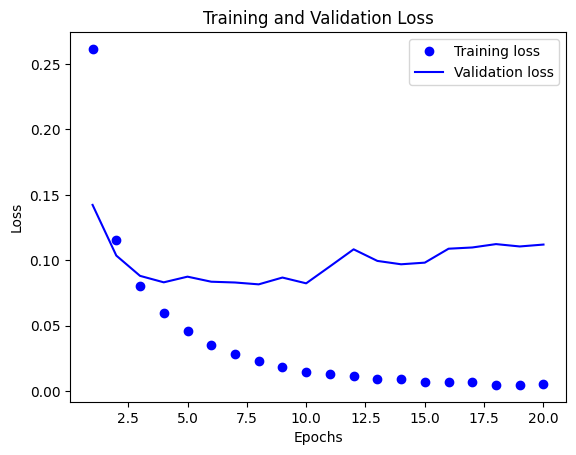

In [3]:
import matplotlib.pyplot as plt

# 訓練誤差と検証誤差を取得
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# エポック数を取得
epochs = range(1, len(train_loss) + 1)

# 誤差のプロット
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training loss**：訓練誤差、学習の誤差です。同じデータを使っているので学習が進むにつれ精度が上がります。

**Validation Loss**: 検証データを用いた評価。学習には使われていないので、一般的なデータを評価したものと考えられる。

最初の頃は、Epoch数（学習回数）が増えるにつれ両方の数値が下がっていきます。しかし、5回過ぎからValidation Lossが減るどころか増える傾向にあります。過学習と考えられます。（50回くらい学習するとより明らかです）

リスト1-3

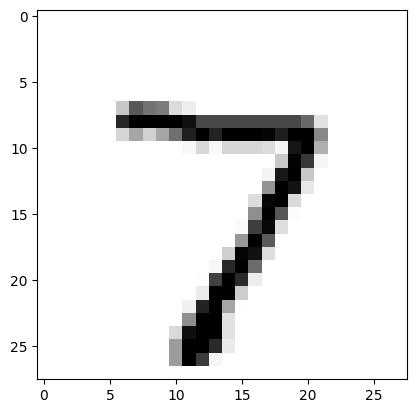

313/313 [==============================] - 1s 1ms/step
この画像は「7」です。 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_test[0], cmap="Greys")
plt.show()
pre = model.predict(x_test)
index = np.argmax(pre[0])
print(f"この画像は「{index}」です。 ")

In [9]:
import numpy as np

# Predict
pre = model.predict(x_test)

# Extract predicted and actual labels for the first 50 images # 50個の確認
results = []
for i in range(50):
    predicted_label = np.argmax(pre[i])
    actual_label = y_test[i]
    results.append((predicted_label, actual_label))

# Display the results
for i, (predicted, actual) in enumerate(results):
    print(f"{i + 1}: Predicted: {predicted}, Actual: {actual}")


313/313 [==============================] - 0s 1ms/step
1: Predicted: 7, Actual: 7
2: Predicted: 2, Actual: 2
3: Predicted: 1, Actual: 1
4: Predicted: 0, Actual: 0
5: Predicted: 4, Actual: 4
6: Predicted: 1, Actual: 1
7: Predicted: 4, Actual: 4
8: Predicted: 9, Actual: 9
9: Predicted: 5, Actual: 5
10: Predicted: 9, Actual: 9
11: Predicted: 0, Actual: 0
12: Predicted: 6, Actual: 6
13: Predicted: 9, Actual: 9
14: Predicted: 0, Actual: 0
15: Predicted: 1, Actual: 1
16: Predicted: 5, Actual: 5
17: Predicted: 9, Actual: 9
18: Predicted: 7, Actual: 7
19: Predicted: 3, Actual: 3
20: Predicted: 4, Actual: 4
21: Predicted: 9, Actual: 9
22: Predicted: 6, Actual: 6
23: Predicted: 6, Actual: 6
24: Predicted: 5, Actual: 5
25: Predicted: 4, Actual: 4
26: Predicted: 0, Actual: 0
27: Predicted: 7, Actual: 7
28: Predicted: 4, Actual: 4
29: Predicted: 0, Actual: 0
30: Predicted: 1, Actual: 1
31: Predicted: 3, Actual: 3
32: Predicted: 1, Actual: 1
33: Predicted: 3, Actual: 3
34: Predicted: 4, Actual: 4
35

313/313 [==============================] - 0s 1ms/step


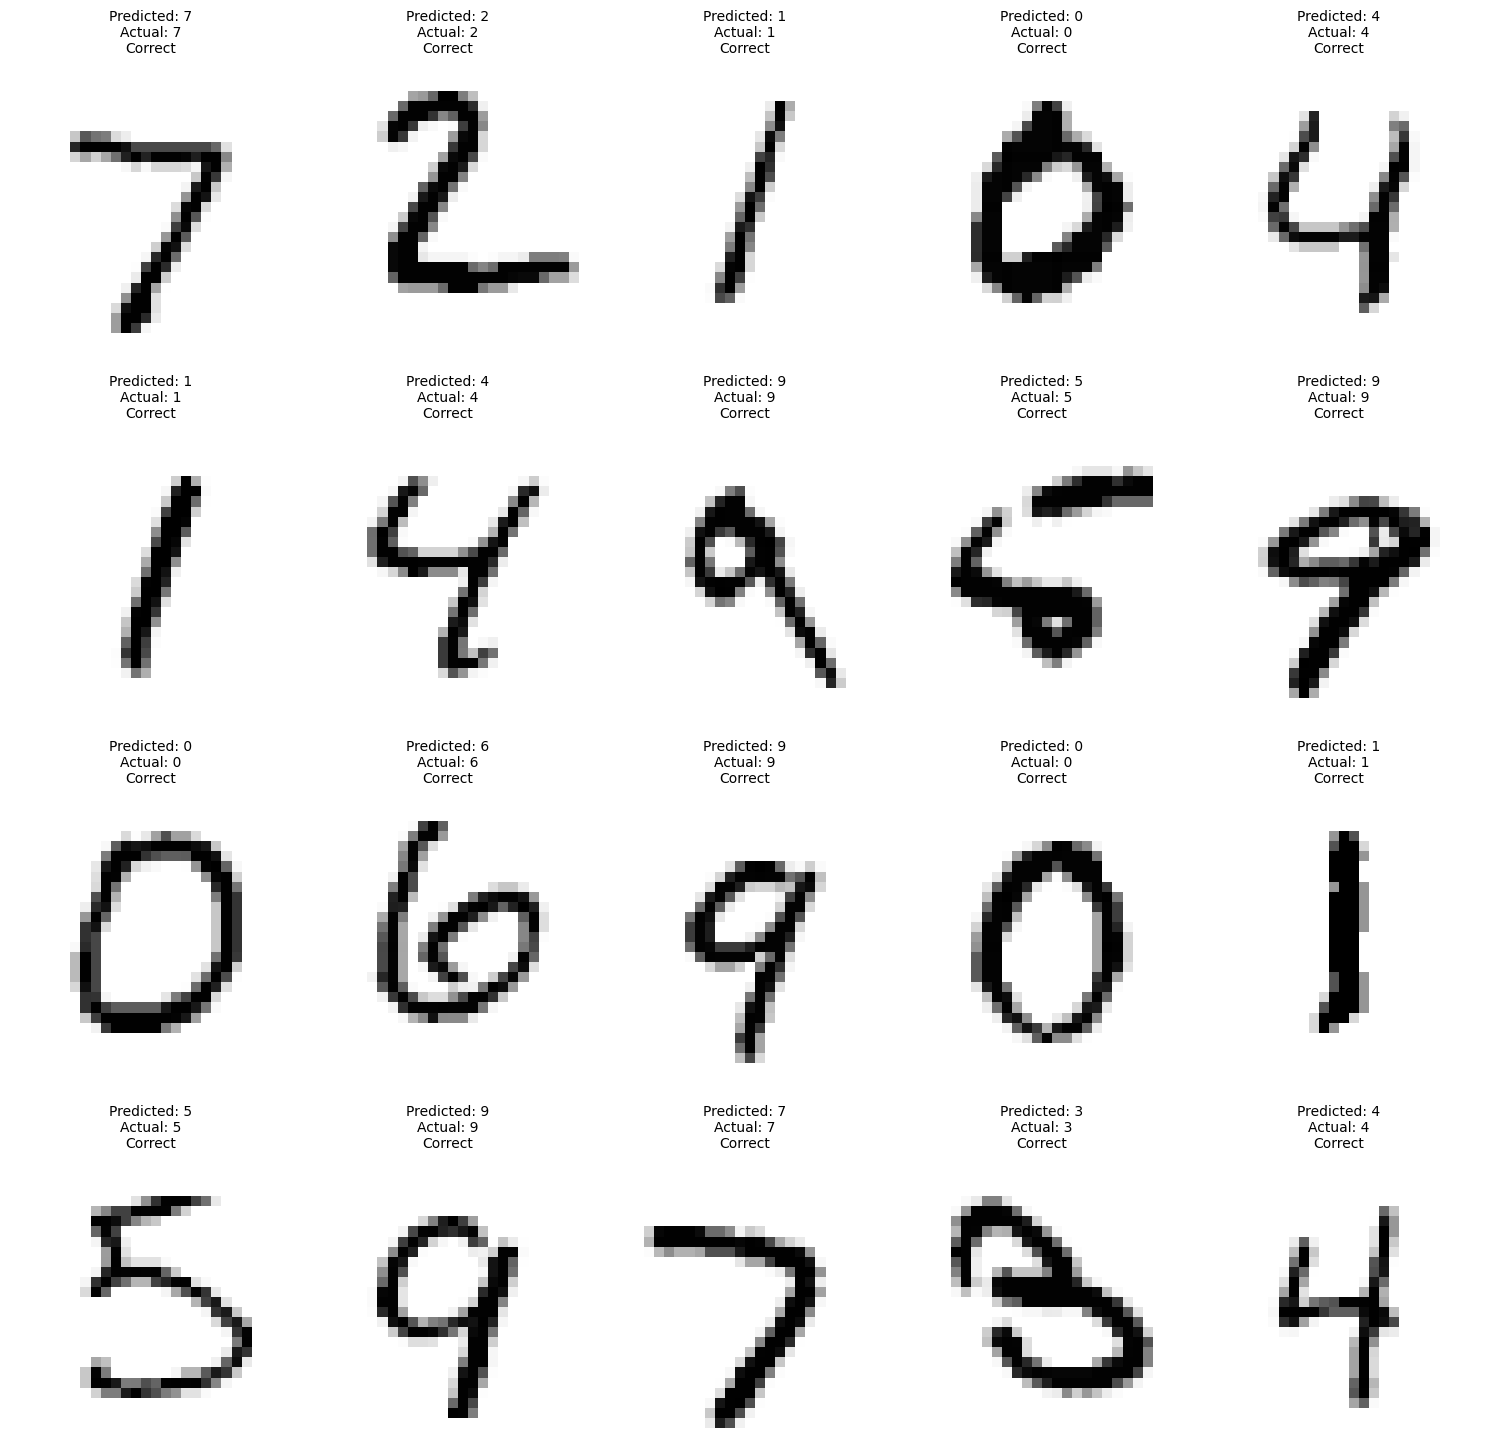

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Predict
pre = model.predict(x_test)

# Display 20 images along with predictions and actual results
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)  # 4x5 grid
    plt.imshow(x_test[i], cmap="Greys")

    # Get predicted and actual labels
    predicted_label = np.argmax(pre[i])
    actual_label = y_test[i]

    # Display result
    result_text = "Correct" if predicted_label == actual_label else "Incorrect"
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}\n{result_text}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()
